Sentiment Analysis on CoronaVirus Tweets

Description

**Data Preprocessing**

*   Stemmning(Without & With removing non alphabetic characters), Lemmatization(Without & With removing non alphabetic characters)



Importing Components

In [139]:
import os
!pip install tensorflow
!pip install cufflinks
!pip install textblob
!pip install wordcloud

In [140]:
#@title Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy 
nltk.download('stopwords')
nltk.download("book")
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    | 

In [141]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [142]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/Shareddrives/Project 4.2/Corona dataset/Corona_NLP.tsv', delimiter = '\t')
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and loved ones from #coronavirus. ?,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event? https://t.co/IASiReGPC4 #QAnon #QAnon2018 #QAnon2020 #Election2020 #CDC https://t.co/29isZOewxu,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral


In [143]:
dataset.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44518,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral
44519,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVID-19 related delays. Yet prompt in rejecting policy before consumer TAT is over. Way to go ?,Extremely Negative
44520,44953,89905,NaN,14-04-2020,"You know its getting tough when @KameronWilds is rationing toilet paper #coronavirus #toiletpaper @kroger martinsville, help us out!!",Positive
44521,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer is starting to turn me on? #coronavirus #COVID19 #coronavirus,Neutral
44522,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for $700.00 on Amazon rn although the normal market price is usually $400.00 . Prices are really crazy right now for vr headsets since HL Alex was announced and it's only been worse with COVID-19. Up to you whethe,Negative


In [144]:
dataset.describe()

,UserName,ScreenName
count,44523.000000,44523.000000
mean,22434.912562,67386.912562
std,12975.492659,12975.492659
min,1.000000,44953.000000
25%,11203.500000,56155.500000
50%,22404.000000,67356.000000
75%,33661.500000,78613.500000
max,44955.000000,89907.000000


In [145]:
#@title Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Dataset Description

In [146]:
pd.set_option("display.max_colwidth", -1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



In [147]:
#@title Dataset Head
dataset = pd.read_csv('/content/drive/Shareddrives/Project 4.2/Corona dataset/Corona_NLP2.csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.dropna(inplace = True)
dataset.shape
dataset

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,44953,NYC,02-03-2020,"TRENDING: New Yorkers encounter empty supermarket shelves (pictured, Wegmans in Brooklyn), sold-out online grocers (FoodKick, MaxDelivery) as #coronavirus-fearing shoppers stock up https://t.co/Gr76pcrLWh https://t.co/ivMKMsqdT1",Extremely Negative
1,44954,"Seattle, WA",02-03-2020,"When I couldn't find hand sanitizer at Fred Meyer, I turned to #Amazon. But $114.97 for a 2 pack of Purell??!!Check out how #coronavirus concerns are driving up prices. https://t.co/ygbipBflMY",Positive
3,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious shoppers stock up on food&amp;medical supplies after #healthcare worker in her 30s becomes #BigApple 1st confirmed #coronavirus patient OR a #Bloomberg staged event? https://t.co/IASiReGPC4 #QAnon #QAnon2018 #QAnon2020 #Election2020 #CDC https://t.co/29isZOewxu,Negative
4,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronavirusaustralia #CoronaVirusUpdate #Covid_19 #9News #Corvid19 #7NewsMelb #dunnypapergate #Costco One week everyone buying baby milk powder the next everyone buying up toilet paper. https://t.co/ScZryVvsIh,Neutral
5,44958,Los Angeles,03-03-2020,Do you remember the last time you paid $2.99 a gallon for regular gas in Los Angeles?Prices at the pump are going down. A look at how the #coronavirus is impacting prices. 4pm @ABC7 https://t.co/Pyzq8YMuV5,Neutral
...,...,...,...,...,...
44513,89898,"Brooklyn, NY",14-04-2020,Yall really shitting that much more at home?? #COVID19 #coronavirus #toiletpaper,Negative
44515,89900,"Toronto, Ontario",14-04-2020,"Still shocked by the number of #Toronto supermarket employees working without some sort of mask. We all know by now, employees can be asymptomatic while spreading #coronavirus .",Negative
44516,89901,OHIO,14-04-2020,"I never that wed be in a situation &amp; world that going to the supermarket , picking up a package or my mail is like playing Russian roulette with my life #coronavirus #StayHome #SocialDistancing",Positive
44518,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket shelves in #NZ lockdown #COVID-19 https://t.co/cz89uA0HNp,Neutral


In [148]:
dataset.sample(6)

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
27668,72840,Singapore,26-03-2020,Experts say social activities and entertainment in VR will be more attractive in the long term as people are stuck at home curing the COVID-19 pandemic. #5G #Consumer #Coronavirus #Entertainment #Gaming https://t.co/AYUSbgFeEo,Extremely Positive
32641,77863,"Maine, USA",05-04-2020,"Based on what Im seeing in my weekly grocery trip, people need a primer on how to use disposable gloves properly. As a scientist who wears gloves to protect me from lethal chemicals (abd to avoid contaminating ice age specimens), let me share some tips:",Positive
33914,79136,"Sydney, Australia",06-04-2020,Crazy times demand unorthodox solutions The federal government must contract with companies throughout the country to widely produce and distribute free soap and hand sanitizer,Extremely Positive
23548,68666,Panamá,24-03-2020,Leading a consumer bank through the coronavirus pandemic #TD_CBD #TD_Banca #Coronavirus https://t.co/Pru830mbkC,Neutral
40236,85523,"Manitoba, Canada",10-04-2020,Manitoba farmers market offering online shopping amid COVID 19 pandemic,Neutral
12790,57815,"Boise, ID",20-03-2020,Trump hopes sanctions Covid 19 kill enough Iranians weaken govt to force regime change Such murderous policy strengthen Iranians amp govt Its New Year celebration weathers US perfect storm of sanctions low oil prices Covid 19 Resulting humanitarian crisis makes it more,Extremely Negative


In [149]:
print(dataset.groupby(['Sentiment'])['Sentiment'].count())

Sentiment
Extremely Negative    4651
Extremely Positive    5695
Negative              8492
Neutral               6594
Positive              9742
Name: Sentiment, dtype: int64


# Model 1
*  **Preprocessing:** Lemmatization,without removing non-alphabetic character
*  **Feature Extraction:** TF-IDF, Bag of Words



**Model 1:**
without removing non alphabetic character



In [150]:
# @title Data Preprocessing: Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(normalize, lowercase=True, remove_stopwords=True)


# Optional

**Saving preprocessed data in CSV and downloading**

In [151]:
#run after preprocessing... it might give error bt dont worry,, file will create in local and can be downloaded
dataset.to_csv('first_preprocessed_data1.csv', index=False)
from google.colab import files
files.download("first_preprocessed_data1.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**TF-IDF Model**

In [152]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(1,3), analyzer='char')
x = tfidf.fit_transform(dataset['OriginalTweet'])
y = dataset['Sentiment']
x.shape

(35174, 62842)

**Splitting Dataset**

In [153]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**Support Vector Machine**

In [154]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [155]:
#@title Support Vector Machine
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(x_train,y_train)
y_pred = ovr_classifier.predict(x_test)

In [156]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % svm_f1_score)


[[497  19 291  57  91]
 [ 19 625  78  74 338]
 [250  93 630 286 426]
 [ 33  51 185 738 288]
 [ 78 364 326 345 853]]


                    precision    recall  f1-score   support

Extremely Negative       0.57      0.52      0.54       955
Extremely Positive       0.54      0.55      0.55      1134
          Negative       0.42      0.37      0.39      1685
           Neutral       0.49      0.57      0.53      1295
          Positive       0.43      0.43      0.43      1966

          accuracy                           0.48      7035
         macro avg       0.49      0.49      0.49      7035
      weighted avg       0.47      0.48      0.47      7035



Accuracy: 0.475195
Precision: 0.489163
Recall: 0.489843
F1 Score: 0.488485


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



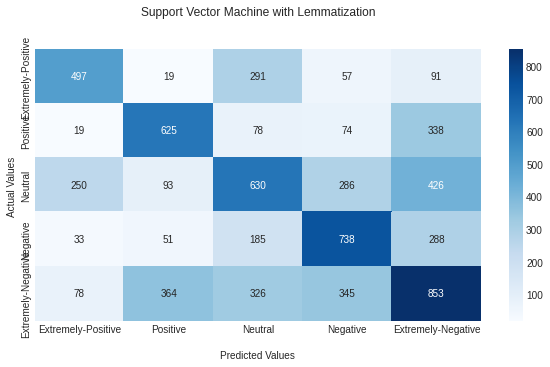

In [157]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Logistic Regression**

In [158]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [159]:
# @title Logistic Regression
log = LogisticRegression(solver='saga', max_iter=1000)
ovr = OneVsRestClassifier(log)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [160]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

log_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % log_accuracy)

log_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % log_precision)

log_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % log_recall)

log_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % log_f1_score)


[[ 374   21  376   51  133]
 [  13  533   91   74  423]
 [ 166   72  661  273  513]
 [  24   31  172  759  309]
 [  56  257  315  321 1017]]


                    precision    recall  f1-score   support

Extremely Negative       0.59      0.39      0.47       955
Extremely Positive       0.58      0.47      0.52      1134
          Negative       0.41      0.39      0.40      1685
           Neutral       0.51      0.59      0.55      1295
          Positive       0.42      0.52      0.47      1966

          accuracy                           0.48      7035
         macro avg       0.50      0.47      0.48      7035
      weighted avg       0.49      0.48      0.47      7035



Accuracy: 0.475338
Precision: 0.504289
Recall: 0.471464
F1 Score: 0.481195


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



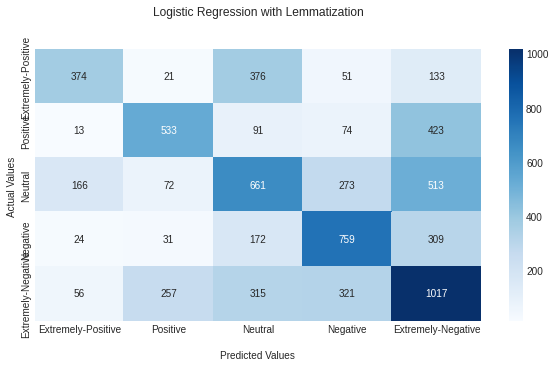

In [161]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Naive Bayes**

In [162]:
# create and train the Naive Bayes Classifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [163]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % nb_f1_score)

[[   0    0  142    4  809]
 [   0    1    4    2 1127]
 [   0    0  115   14 1556]
 [   0    0   45   47 1203]
 [   0    1   30    8 1927]]


                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       955
Extremely Positive       0.50      0.00      0.00      1134
          Negative       0.34      0.07      0.11      1685
           Neutral       0.63      0.04      0.07      1295
          Positive       0.29      0.98      0.45      1966

          accuracy                           0.30      7035
         macro avg       0.35      0.22      0.13      7035
      weighted avg       0.36      0.30      0.17      7035



Accuracy: 0.297086


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify

Precision: 0.351986
Recall: 0.217117
F1 Score: 0.126589


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



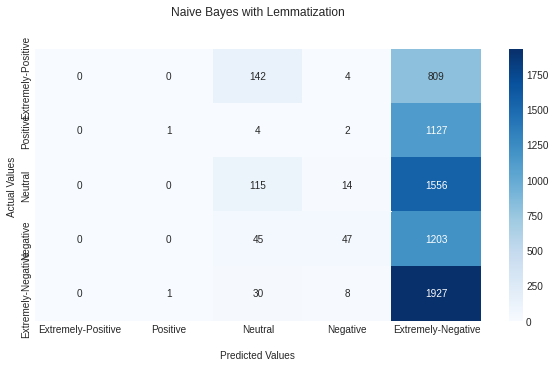

In [164]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Random Forest**

In [165]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

In [166]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)


In [167]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % rf_f1_score)


[[ 155   62  291   75  372]
 [  28  238  175   97  596]
 [  92   97  512  269  715]
 [  21   58  236  504  476]
 [  75  172  363  305 1051]]


                    precision    recall  f1-score   support

Extremely Negative       0.42      0.16      0.23       955
Extremely Positive       0.38      0.21      0.27      1134
          Negative       0.32      0.30      0.31      1685
           Neutral       0.40      0.39      0.40      1295
          Positive       0.33      0.53      0.41      1966

          accuracy                           0.35      7035
         macro avg       0.37      0.32      0.32      7035
      weighted avg       0.36      0.35      0.34      7035



Accuracy: 0.349680
Precision: 0.370531
Recall: 0.319963
F1 Score: 0.324036


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



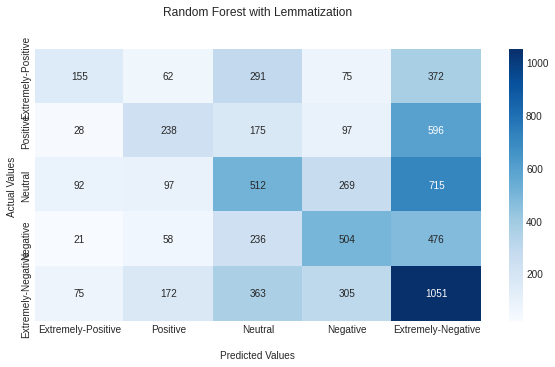

In [168]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**XGBoost**

In [169]:
# @title XGBoost
xgb = XGBClassifier()
ovr = OneVsRestClassifier(xgb)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [170]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)

xgb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % xgb_precision)

xgb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % xgb_recall)

xgb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % xgb_f1_score)


[[ 414   22  279   41  199]
 [  22  531   75   61  445]
 [ 189   69  571  298  558]
 [  21   21  167  711  375]
 [  64  257  277  313 1055]]


                    precision    recall  f1-score   support

Extremely Negative       0.58      0.43      0.50       955
Extremely Positive       0.59      0.47      0.52      1134
          Negative       0.42      0.34      0.37      1685
           Neutral       0.50      0.55      0.52      1295
          Positive       0.40      0.54      0.46      1966

          accuracy                           0.47      7035
         macro avg       0.50      0.47      0.48      7035
      weighted avg       0.48      0.47      0.47      7035



Accuracy: 0.466525
Precision: 0.498065
Recall: 0.465258
F1 Score: 0.475048


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



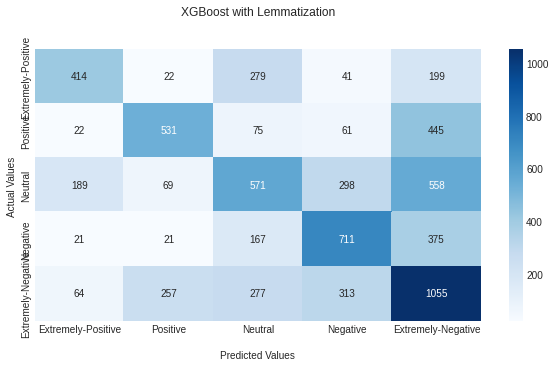

In [171]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XGBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Comparision Graphs**

       Score       SVM        LR        RF       XGB
0  Accuracy   0.475195  0.475338  0.349680  0.466525
1  Precision  0.489163  0.504289  0.370531  0.498065
2  Recall     0.489843  0.471464  0.319963  0.465258
3  F1 Score   0.488485  0.481195  0.324036  0.475048





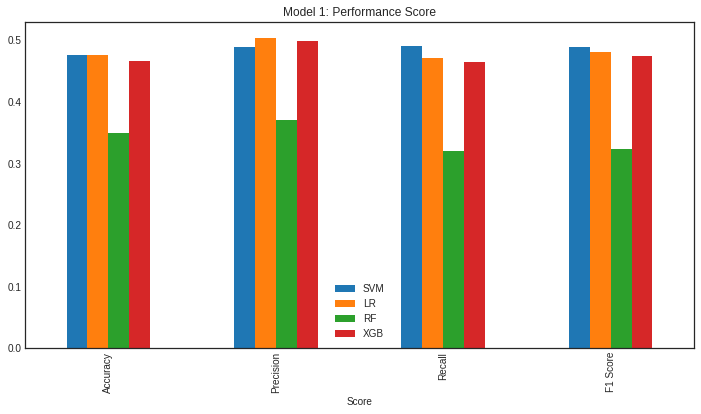

In [172]:
# @title Comparision Graphs


cmpDf = pd.DataFrame([['Accuracy', svm_accuracy, log_accuracy, rf_accuracy, xgb_accuracy], 
                      ['Precision', svm_precision, log_precision, rf_precision, xgb_precision], 
                      ['Recall', svm_recall, log_recall, rf_recall, xgb_recall],
                      ['F1 Score', svm_f1_score, log_f1_score, rf_f1_score, xgb_f1_score]],
                  columns=['Score', 'SVM', 'LR', 'RF', 'XGB'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Model 1: Performance Score')


**Bag of Words**

In [173]:
# @title Feature Extraction: BOW Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)
x = cv.fit_transform(dataset['OriginalTweet'])
y = dataset['Sentiment']
x.shape

(35174, 2000)

**Spliting Dataset**

In [174]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**Support Vector Machine**

In [175]:
#@title Support Vector Machine
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(x_train,y_train)
y_pred = ovr_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [176]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % svm_f1_score)


[[605   6 241  47  56]
 [ 12 784  33  51 254]
 [301  59 684 297 344]
 [ 29  23 124 941 178]
 [ 56 383 292 335 900]]


                    precision    recall  f1-score   support

Extremely Negative       0.60      0.63      0.62       955
Extremely Positive       0.62      0.69      0.66      1134
          Negative       0.50      0.41      0.45      1685
           Neutral       0.56      0.73      0.63      1295
          Positive       0.52      0.46      0.49      1966

          accuracy                           0.56      7035
         macro avg       0.56      0.58      0.57      7035
      weighted avg       0.55      0.56      0.55      7035



Accuracy: 0.556361
Precision: 0.561695
Recall: 0.583045
F1 Score: 0.568560


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



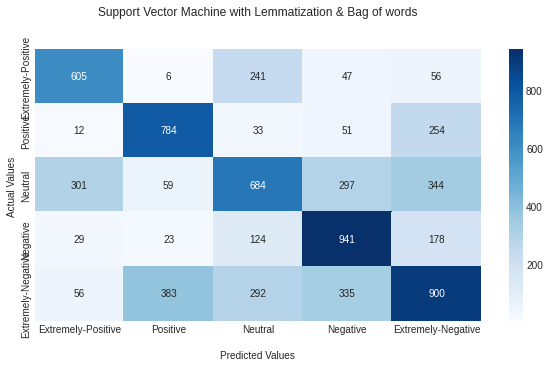

In [178]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization & Bag of words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Logistic Regression**

In [179]:
# @title Logistic Regression
log = LogisticRegression(solver='saga', max_iter=1000)
ovr = OneVsRestClassifier(log)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [180]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

log_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % log_accuracy)

log_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % log_precision)

log_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % log_recall)

log_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % log_f1_score)


[[ 535   12  305   40   63]
 [   8  715   46   34  331]
 [ 259   57  731  253  385]
 [  25   25  154  868  223]
 [  46  339  279  261 1041]]


                    precision    recall  f1-score   support

Extremely Negative       0.61      0.56      0.59       955
Extremely Positive       0.62      0.63      0.63      1134
          Negative       0.48      0.43      0.46      1685
           Neutral       0.60      0.67      0.63      1295
          Positive       0.51      0.53      0.52      1966

          accuracy                           0.55      7035
         macro avg       0.56      0.56      0.56      7035
      weighted avg       0.55      0.55      0.55      7035



Accuracy: 0.552950
Precision: 0.564772
Recall: 0.564864
F1 Score: 0.563846


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



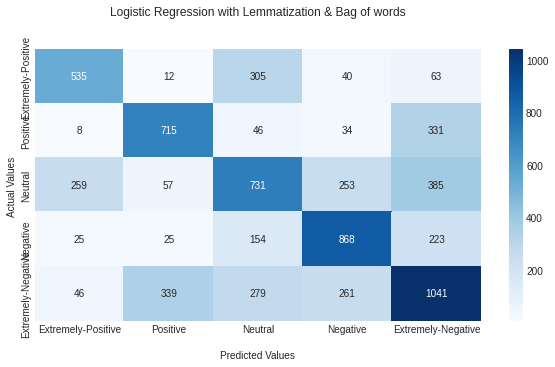

In [182]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression with Lemmatization & Bag of words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Naive Bayes**

In [183]:
# create and train the Naive Bayes Classifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [184]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % nb_f1_score)

[[526  21 278  67  63]
 [ 23 698  80  53 280]
 [329 115 645 284 312]
 [ 48  66 184 793 204]
 [ 89 499 311 351 716]]


                    precision    recall  f1-score   support

Extremely Negative       0.52      0.55      0.53       955
Extremely Positive       0.50      0.62      0.55      1134
          Negative       0.43      0.38      0.41      1685
           Neutral       0.51      0.61      0.56      1295
          Positive       0.45      0.36      0.40      1966

          accuracy                           0.48      7035
         macro avg       0.48      0.51      0.49      7035
      weighted avg       0.48      0.48      0.47      7035



Accuracy: 0.480171
Precision: 0.482921
Recall: 0.505128
F1 Score: 0.490536


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



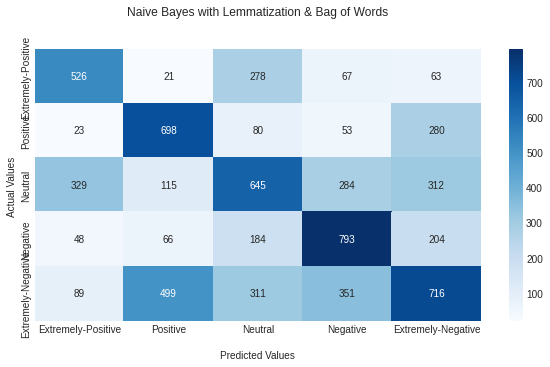

In [185]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Random Forest**

In [186]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)


In [187]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % rf_f1_score)


[[ 407   10  346   65  127]
 [  11  444   73   50  556]
 [ 150   56  755  316  408]
 [  16   25  142  884  228]
 [  55  199  245  245 1222]]


                    precision    recall  f1-score   support

Extremely Negative       0.64      0.43      0.51       955
Extremely Positive       0.60      0.39      0.48      1134
          Negative       0.48      0.45      0.47      1685
           Neutral       0.57      0.68      0.62      1295
          Positive       0.48      0.62      0.54      1966

          accuracy                           0.53      7035
         macro avg       0.55      0.51      0.52      7035
      weighted avg       0.54      0.53      0.52      7035



Accuracy: 0.527647
Precision: 0.554616
Recall: 0.513995
F1 Score: 0.522552


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



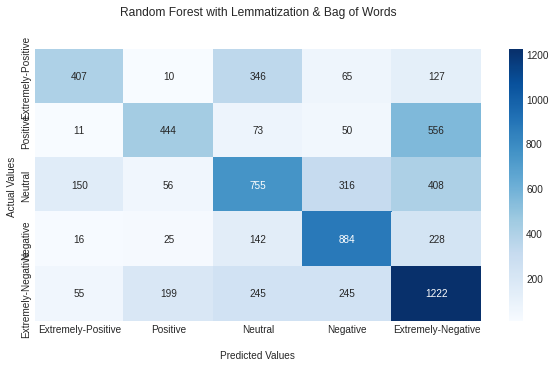

In [188]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**XGBoost**

In [189]:
# @title XGBoost
xgb = XGBClassifier()
ovr = OneVsRestClassifier(xgb)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [190]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)

xgb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % xgb_precision)

xgb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % xgb_recall)

xgb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % xgb_f1_score)


[[ 415   18  291   90  141]
 [  16  547   38   84  449]
 [ 148   55  605  333  544]
 [  20   15   52  696  512]
 [  43  223  217  312 1171]]


                    precision    recall  f1-score   support

Extremely Negative       0.65      0.43      0.52       955
Extremely Positive       0.64      0.48      0.55      1134
          Negative       0.50      0.36      0.42      1685
           Neutral       0.46      0.54      0.50      1295
          Positive       0.42      0.60      0.49      1966

          accuracy                           0.49      7035
         macro avg       0.53      0.48      0.49      7035
      weighted avg       0.51      0.49      0.49      7035



Accuracy: 0.488131
Precision: 0.532390
Recall: 0.481809
F1 Score: 0.494584


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



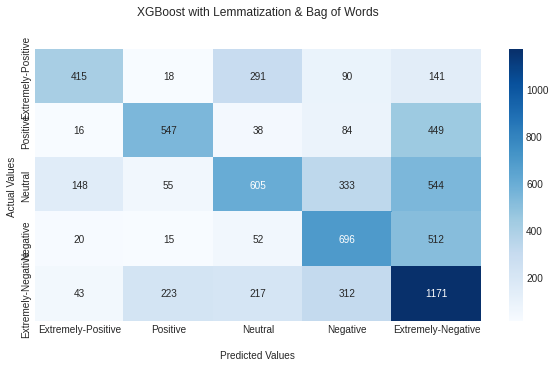

In [191]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XGBoost with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Comparision Graphs**

       Score       SVM        LR        RF       XGB
0  Accuracy   0.556361  0.552950  0.527647  0.488131
1  Precision  0.561695  0.564772  0.554616  0.532390
2  Recall     0.583045  0.564864  0.513995  0.481809
3  F1 Score   0.568560  0.563846  0.522552  0.494584





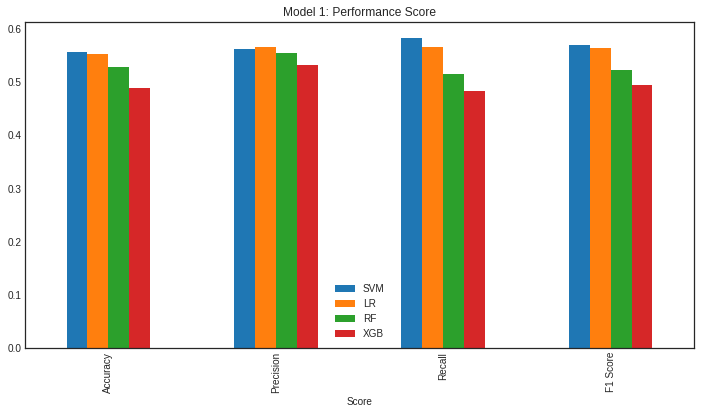

In [192]:
# @title Comparision Graphs


cmpDf = pd.DataFrame([['Accuracy', svm_accuracy, log_accuracy, rf_accuracy, xgb_accuracy], 
                      ['Precision', svm_precision, log_precision, rf_precision, xgb_precision], 
                      ['Recall', svm_recall, log_recall, rf_recall, xgb_recall],
                      ['F1 Score', svm_f1_score, log_f1_score, rf_f1_score, xgb_f1_score]],
                  columns=['Score', 'SVM', 'LR', 'RF', 'XGB'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Model 1: Performance Score')


# Model 2
*  **Preprocessing:** Lemmatization, Removing non-alphabetic character
*  **Feature Extraction:** TF-IDF & Bag of Words

**Model 2:**
removing non alphabetic character

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('/content/drive/Shareddrives/Project 4.2/Corona dataset/first_preprocessed_data1.tsv', delimiter = '\t', quoting = 3)
dataset.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,44953,NYC,02-03-2020,"trend : new yorker encounter empty supermarket shelve ( picture , wegmans brooklyn ) , sell - online grocer ( foodkick , maxdelivery ) # coronavirus - fear shopper stock https://t.co/gr76pcrlwh https://t.co/ivmkmsqdt1",Extremely Negative
1,44954,"Seattle, WA",02-03-2020,"could find hand sanitizer fred meyer , turn # amazon . $ 114.97 2 pack purell??!!check # coronavirus concern drive price . https://t.co/ygbipbflmy",Positive
2,44956,Chicagoland,02-03-2020,# panic buy hit # newyork city anxious shopper stock food&amp;medical supply # healthcare worker 30s become # bigapple 1st confirm # coronavirus patient # bloomberg stage event ? https://t.co/iasiregpc4 # qanon # qanon2018 # qanon2020 # election2020 # cdc https://t.co/29iszoewxu,Negative
3,44957,"Melbourne, Victoria",03-03-2020,# toiletpaper # dunnypaper # coronavirus # coronavirusaustralia # coronavirusupdate # covid_19 # 9news # corvid19 # 7newsmelb # dunnypapergate # costco one week everyone buy baby milk powder next everyone buy toilet paper . https://t.co/sczryvvsih,Neutral
4,44958,Los Angeles,03-03-2020,remember last time pay $ 2.99 gallon regular gas los angeles?prices pump go . look # coronavirus impact price . 4 p.m. @abc7 https://t.co/pyzq8ymuv5,Neutral


In [194]:
dataset.tail()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
35169,89898,"Brooklyn, NY",14-04-2020,yall really shit much much home ? ? # covid19 # coronavirus # toiletpaper,Negative
35170,89900,"Toronto, Ontario",14-04-2020,"still shock numb # toronto supermarket employee work without sort mask . know , employee asymptomatic spread # coronavirus .",Negative
35171,89901,OHIO,14-04-2020,"never wed situation & amp ; world go supermarket , pick package mail like play russian roulette life # coronavirus # stayhome # socialdistancing",Positive
35172,89903,"Wellington City, New Zealand",14-04-2020,airline pilot offer stock supermarket shelve # nz lockdown # covid-19 https://t.co/cz89ua0hnp,Neutral
35173,89907,i love you so much || he/him,14-04-2020,@tartiicat good new / use rift go $ 700.00 amazon rn although normal market price usually $ 400.00 . price really crazy right vr headset since hl alex announce -PRON- wrong covid-19 . whethe,Negative


In [195]:
len(dataset)

35174

In [196]:
dataset.isnull().sum()

ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

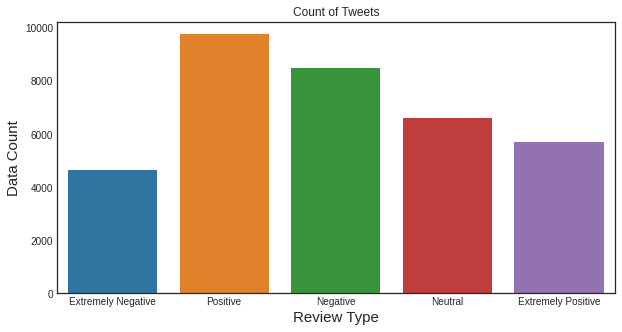

In [197]:
#@title Dataset Outcome Graph
ax = sns.countplot(x='Sentiment', data=dataset)


#Setting labels and font size
ax.set(xlabel='Review Type', ylabel='Data Count',title='Count of Tweets')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



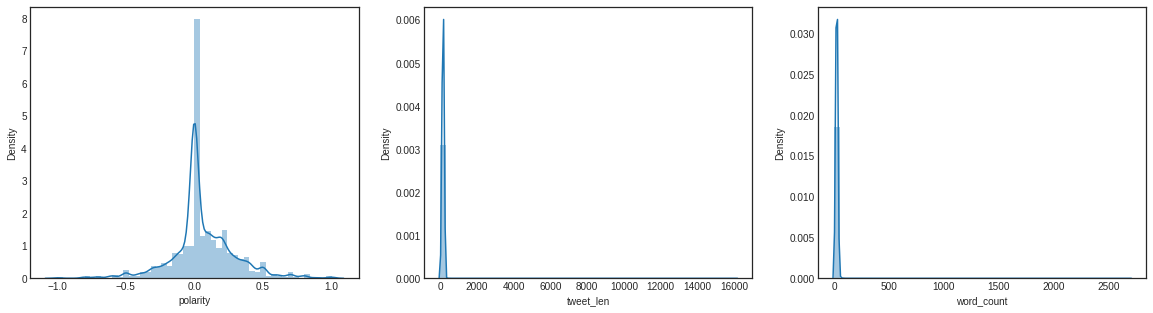

In [198]:
#Extracting the features from the news
df = []
df = dataset.copy()
df['polarity'] = df['OriginalTweet'].map(lambda text: TextBlob(text).sentiment.polarity)
df['tweet_len'] = df['OriginalTweet'].astype(str).apply(len)
df['word_count'] = df['OriginalTweet'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(df['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(df['tweet_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(df['word_count'])
fig = plt.gcf()


In [199]:
from sklearn.feature_extraction.text import CountVectorizer
#Function to get top n words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

#Calling function and return only top 20 words
common_words = get_top_n_words(corpus, 20)

#Printing the word and frequency
for word, freq in common_words:
    print(word, freq)

#Creating the dataframe of word and frequency
df1 = pd.DataFrame(common_words, columns = ['OriginalTweet' , 'count'])

#Group by words and plot the sum
df1.groupby('OriginalTweet').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 words in tweets')

covid 9513
co 8736
http 8661
coronaviru 7389
store 4169
food 3699
supermarket 3493
groceri 3181
price 3002
peopl 2787
go 2688
shop 2329
amp 2156
much 2117
get 2075
buy 2062
pron 1860
panic 1836
stock 1736
need 1711


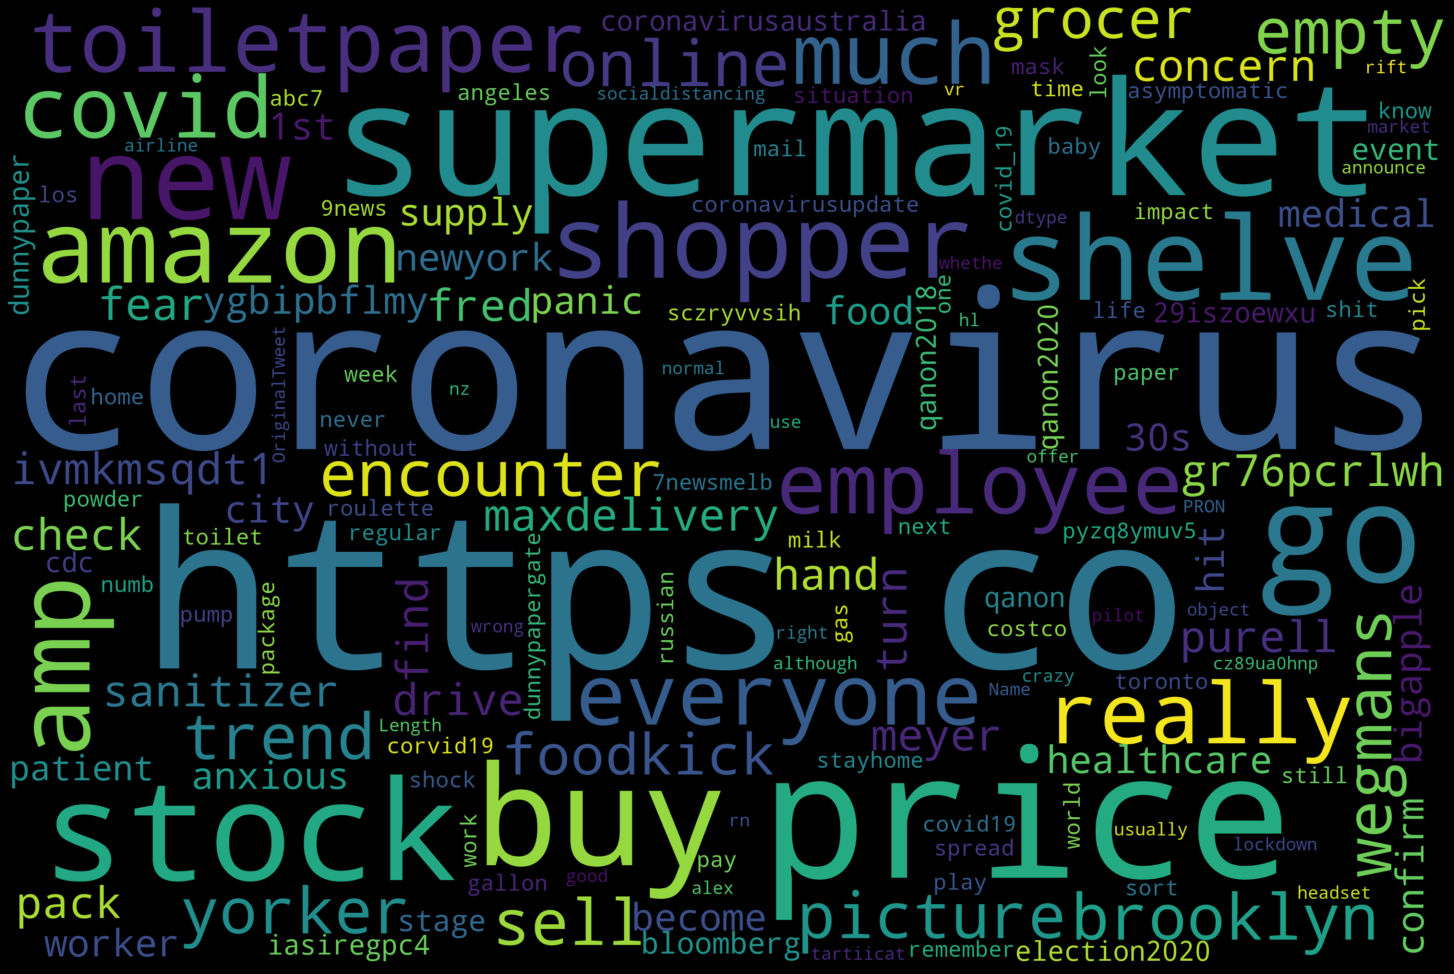

In [200]:
from wordcloud import WordCloud,STOPWORDS
text = df["OriginalTweet"]
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (20, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

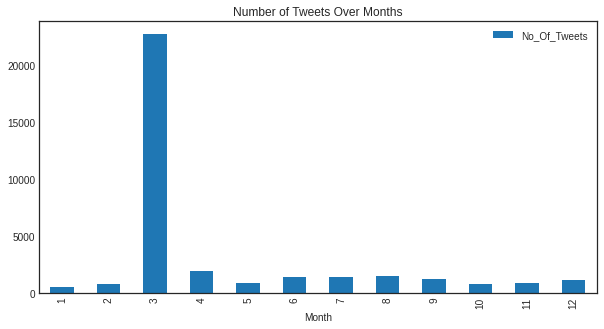

In [201]:
# Converting the data type of 'TweetAt' column in the Dataframe 'POI' to datetime format.
df['TweetAt']= pd.to_datetime(df['TweetAt'])

# Creating an Addtional column as 'Month' in Datatframe 'POI' for Month by taking the month part of 'TweetAt' column.
df['Month']=df['TweetAt'].dt.month


MonthlyCount=df.groupby('Month')['Sentiment'].count().reset_index()
MonthlyCount=MonthlyCount.rename(columns={'Sentiment':'No_Of_Tweets'})

MonthlyCount.head()

# Taking into .csv
MonthlyCount.to_csv('../content/drive/Shareddrives/Project 4.2/Corona dataset/Monthly_Count.csv')

MonthlyCount.plot(x="Month",y="No_Of_Tweets",kind="bar",title="Number of Tweets Over Months")
plt.show()

In [202]:
# @title Data Preprocessing: Lemmatization
nlp = spacy.load("en", disable=['parser', 'tagger', 'ner'])
nlp.Defaults.stop_words -= {"no", "not", "n't", "nothing", "without", "nobody"}
stops = stopwords.words("english")

def normalize(comment, lowercase, remove_stopwords):
    if lowercase:
        comment = comment.lower()
    comment = re.sub('[^a-zA-Z]', ' ',comment)  #######################
    comment = nlp(comment)
    lemmatized = list()
    for word in comment:
        lemma = word.lemma_.strip()
        if lemma:
            if not remove_stopwords or (remove_stopwords and lemma not in stops):
                lemmatized.append(lemma)
    return " ".join(lemmatized)


dataset['OriginalTweet'] = dataset['OriginalTweet'].apply(normalize, lowercase=True, remove_stopwords=True)


**TF-IDF model**

In [203]:
# @title Feature Extraction: TF-IDF Model
tfidf = TfidfVectorizer( ngram_range=(1,3), analyzer='char')
x = tfidf.fit_transform(dataset['OriginalTweet'])
y = dataset['Sentiment']
x.shape

(35174, 20463)

**Splitting Dataset**

In [204]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**Support Vector Machine**

In [205]:
#@title Support Vector Machine
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(x_train,y_train)
y_pred = ovr_classifier.predict(x_test)

In [206]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % svm_f1_score)


[[493  19 295  53  95]
 [ 15 636  85  61 337]
 [286  94 627 289 389]
 [ 40  52 207 727 269]
 [ 81 344 330 350 861]]


                    precision    recall  f1-score   support

Extremely Negative       0.54      0.52      0.53       955
Extremely Positive       0.56      0.56      0.56      1134
          Negative       0.41      0.37      0.39      1685
           Neutral       0.49      0.56      0.52      1295
          Positive       0.44      0.44      0.44      1966

          accuracy                           0.48      7035
         macro avg       0.49      0.49      0.49      7035
      weighted avg       0.47      0.48      0.47      7035



Accuracy: 0.475338
Precision: 0.486575
Recall: 0.489704
F1 Score: 0.487471


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



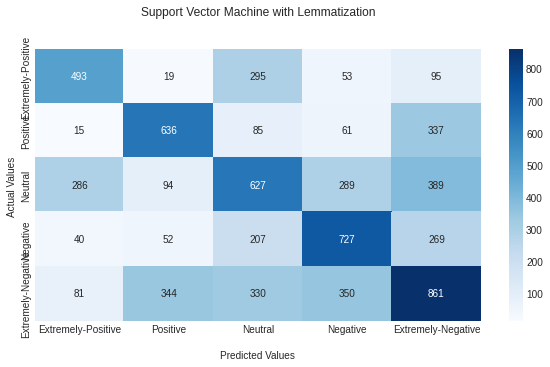

In [207]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Logistic Regression**

In [208]:
# @title Logistic Regression
log = LogisticRegression(solver='saga', max_iter=1000)
ovr = OneVsRestClassifier(log)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [209]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

log_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % log_accuracy)

log_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % log_precision)

log_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % log_recall)

log_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % log_f1_score)


[[ 389   19  369   49  129]
 [  12  550   83   60  429]
 [ 178   70  676  263  498]
 [  26   34  184  730  321]
 [  49  237  335  324 1021]]


                    precision    recall  f1-score   support

Extremely Negative       0.59      0.41      0.48       955
Extremely Positive       0.60      0.49      0.54      1134
          Negative       0.41      0.40      0.41      1685
           Neutral       0.51      0.56      0.54      1295
          Positive       0.43      0.52      0.47      1966

          accuracy                           0.48      7035
         macro avg       0.51      0.48      0.49      7035
      weighted avg       0.49      0.48      0.48      7035



Accuracy: 0.478465
Precision: 0.509467
Recall: 0.475312
F1 Score: 0.486388


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



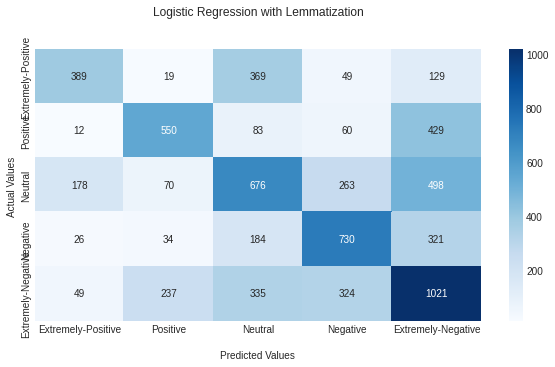

In [210]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Naive Bayes**

In [211]:
# create and train the Naive Bayes Classifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [212]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % nb_f1_score)

[[   0    0  450   14  491]
 [   0    5   39   15 1075]
 [   0    0  474   60 1151]
 [   0    0  165  194  936]
 [   1    2  172   77 1714]]


                    precision    recall  f1-score   support

Extremely Negative       0.00      0.00      0.00       955
Extremely Positive       0.71      0.00      0.01      1134
          Negative       0.36      0.28      0.32      1685
           Neutral       0.54      0.15      0.23      1295
          Positive       0.32      0.87      0.47      1966

          accuracy                           0.34      7035
         macro avg       0.39      0.26      0.21      7035
      weighted avg       0.39      0.34      0.25      7035



Accuracy: 0.339303
Precision: 0.387430
Recall: 0.261469
F1 Score: 0.205654


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



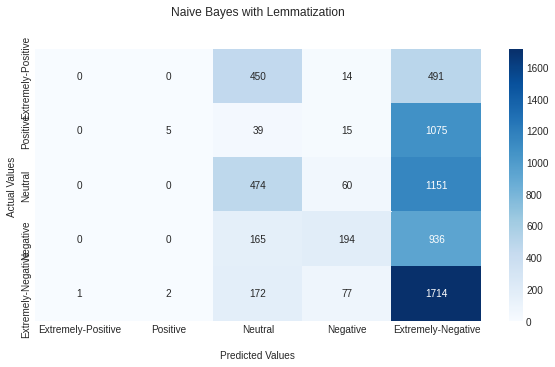

In [213]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Random Forest**

In [214]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)


In [215]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % rf_f1_score)


[[ 187   44  302   91  331]
 [  22  298  170   89  555]
 [ 112   89  503  261  720]
 [  16   49  231  485  514]
 [  63  180  354  310 1059]]


                    precision    recall  f1-score   support

Extremely Negative       0.47      0.20      0.28       955
Extremely Positive       0.45      0.26      0.33      1134
          Negative       0.32      0.30      0.31      1685
           Neutral       0.39      0.37      0.38      1295
          Positive       0.33      0.54      0.41      1966

          accuracy                           0.36      7035
         macro avg       0.39      0.33      0.34      7035
      weighted avg       0.38      0.36      0.35      7035



Accuracy: 0.359915
Precision: 0.393394
Recall: 0.334058
F1 Score: 0.342632


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



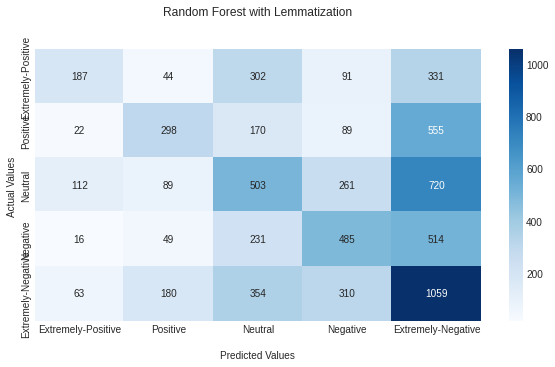

In [216]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**XGBoost**

In [217]:
# @title XGBoost
xgb = XGBClassifier()
ovr = OneVsRestClassifier(xgb)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [218]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)

xgb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % xgb_precision)

xgb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % xgb_recall)

xgb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % xgb_f1_score)


[[ 401   22  287   43  202]
 [  23  526   81   63  441]
 [ 184   75  593  299  534]
 [  21   18  180  695  381]
 [  65  246  286  318 1051]]


                    precision    recall  f1-score   support

Extremely Negative       0.58      0.42      0.49       955
Extremely Positive       0.59      0.46      0.52      1134
          Negative       0.42      0.35      0.38      1685
           Neutral       0.49      0.54      0.51      1295
          Positive       0.40      0.53      0.46      1966

          accuracy                           0.46      7035
         macro avg       0.50      0.46      0.47      7035
      weighted avg       0.48      0.46      0.46      7035



Accuracy: 0.464250
Precision: 0.495868
Recall: 0.461387
F1 Score: 0.471959


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



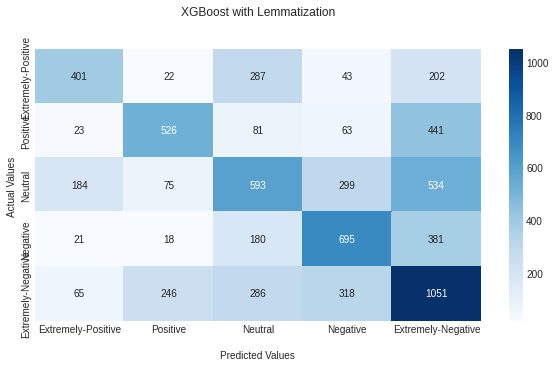

In [219]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XGBoost with Lemmatization\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Comparision Graphs**

       Score       SVM        LR        RF       XGB
0  Accuracy   0.475338  0.478465  0.359915  0.464250
1  Precision  0.486575  0.509467  0.393394  0.495868
2  Recall     0.489704  0.475312  0.334058  0.461387
3  F1 Score   0.487471  0.486388  0.342632  0.471959





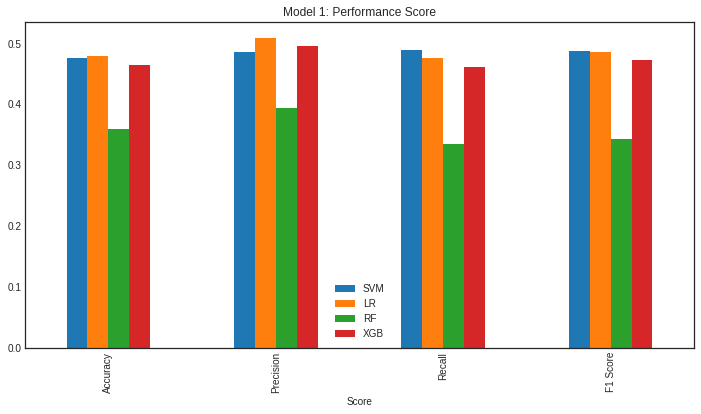

In [220]:
# @title Comparision Graphs


cmpDf = pd.DataFrame([['Accuracy', svm_accuracy, log_accuracy, rf_accuracy, xgb_accuracy], 
                      ['Precision', svm_precision, log_precision, rf_precision, xgb_precision], 
                      ['Recall', svm_recall, log_recall, rf_recall, xgb_recall],
                      ['F1 Score', svm_f1_score, log_f1_score, rf_f1_score, xgb_f1_score]],
                  columns=['Score', 'SVM', 'LR', 'RF', 'XGB'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Model 1: Performance Score')


**Bag of Words**

In [221]:
# @title Feature Extraction: BOW Model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = "word",   
                             tokenizer = None,    
                             preprocessor = None, 
                             stop_words = None,   
                             max_features = 2000)
x = cv.fit_transform(dataset['OriginalTweet'])
y = dataset['Sentiment']
x.shape

(35174, 2000)

**Splitting Dataset**

In [222]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

**Support Vector Machine**

In [223]:
#@title Support Vector Machine
svm = LinearSVC()

ovr_classifier = OneVsRestClassifier(svm)

ovr_classifier.fit(x_train,y_train)
y_pred = ovr_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



In [224]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

svm_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % svm_accuracy)

svm_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % svm_precision)

svm_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % svm_recall)

svm_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % svm_f1_score)


[[610   8 243  48  46]
 [ 12 774  38  53 257]
 [299  59 689 290 348]
 [ 23  27 133 942 170]
 [ 50 364 288 329 935]]


                    precision    recall  f1-score   support

Extremely Negative       0.61      0.64      0.63       955
Extremely Positive       0.63      0.68      0.65      1134
          Negative       0.50      0.41      0.45      1685
           Neutral       0.57      0.73      0.64      1295
          Positive       0.53      0.48      0.50      1966

          accuracy                           0.56      7035
         macro avg       0.57      0.59      0.57      7035
      weighted avg       0.56      0.56      0.56      7035



Accuracy: 0.561478
Precision: 0.567301
Recall: 0.586637
F1 Score: 0.573553


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



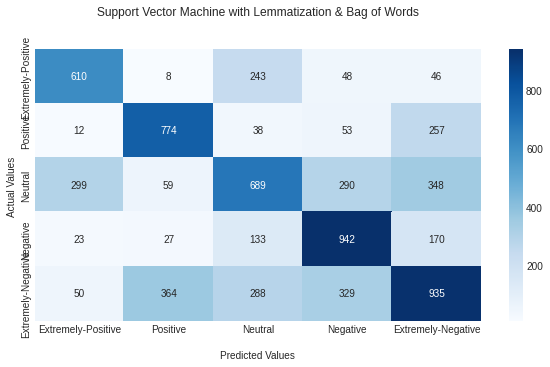

In [226]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Support Vector Machine with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Logistic Regression**

In [227]:
# @title Logistic Regression
log = LogisticRegression(solver='saga', max_iter=1000)
ovr = OneVsRestClassifier(log)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [228]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

log_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % log_accuracy)

log_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % log_precision)

log_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % log_recall)

log_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % log_f1_score)


[[ 583   12  275   36   49]
 [   8  743   39   30  314]
 [ 276   54  736  249  370]
 [  22   28  145  895  205]
 [  48  353  294  251 1020]]


                    precision    recall  f1-score   support

Extremely Negative       0.62      0.61      0.62       955
Extremely Positive       0.62      0.66      0.64      1134
          Negative       0.49      0.44      0.46      1685
           Neutral       0.61      0.69      0.65      1295
          Positive       0.52      0.52      0.52      1966

          accuracy                           0.57      7035
         macro avg       0.57      0.58      0.58      7035
      weighted avg       0.56      0.57      0.56      7035



Accuracy: 0.565316
Precision: 0.574879
Recall: 0.582482
F1 Score: 0.577766


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



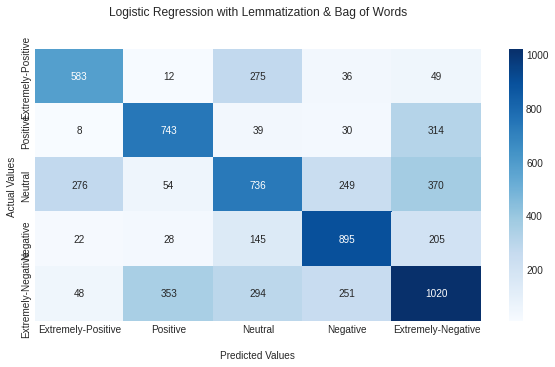

In [230]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Logistic Regression with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Naive Bayes**

In [231]:
# create and train the Naive Bayes Classifier
import numpy as np
from sklearn.datasets import make_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
ovr = OneVsRestClassifier(classifier)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [232]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

nb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % nb_accuracy)

nb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % nb_precision)

nb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % nb_recall)

nb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % nb_f1_score)

[[521  20 289  60  65]
 [ 21 682  80  56 295]
 [330 111 664 273 307]
 [ 53  65 182 795 200]
 [ 82 474 320 344 746]]


                    precision    recall  f1-score   support

Extremely Negative       0.52      0.55      0.53       955
Extremely Positive       0.50      0.60      0.55      1134
          Negative       0.43      0.39      0.41      1685
           Neutral       0.52      0.61      0.56      1295
          Positive       0.46      0.38      0.42      1966

          accuracy                           0.48      7035
         macro avg       0.49      0.51      0.49      7035
      weighted avg       0.48      0.48      0.48      7035



Accuracy: 0.484435
Precision: 0.487434
Recall: 0.506875
F1 Score: 0.494458


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



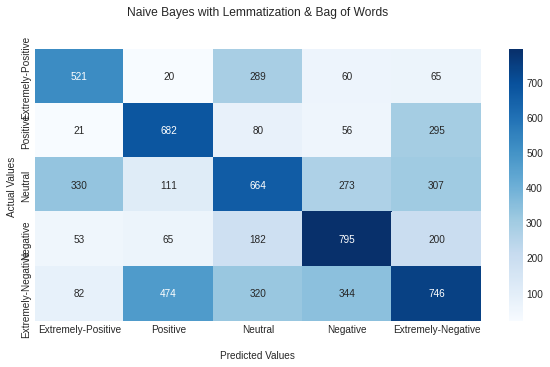

In [233]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Naive Bayes with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Random Forest**

In [234]:
# @title Random Forest
rf = RandomForestClassifier(n_estimators=10,criterion = 'gini', random_state=0)
ovr = OneVsRestClassifier(rf)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)


In [235]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

rf_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % rf_accuracy)

rf_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % rf_precision)

rf_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % rf_recall)

rf_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % rf_f1_score)


[[ 382   15  368   61  129]
 [   8  441   64   38  583]
 [ 170   57  749  298  411]
 [  20   18  132  879  246]
 [  55  209  230  230 1242]]


                    precision    recall  f1-score   support

Extremely Negative       0.60      0.40      0.48       955
Extremely Positive       0.60      0.39      0.47      1134
          Negative       0.49      0.44      0.46      1685
           Neutral       0.58      0.68      0.63      1295
          Positive       0.48      0.63      0.54      1966

          accuracy                           0.52      7035
         macro avg       0.55      0.51      0.52      7035
      weighted avg       0.53      0.52      0.52      7035



Accuracy: 0.524947
Precision: 0.548457
Recall: 0.508781
F1 Score: 0.517113


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



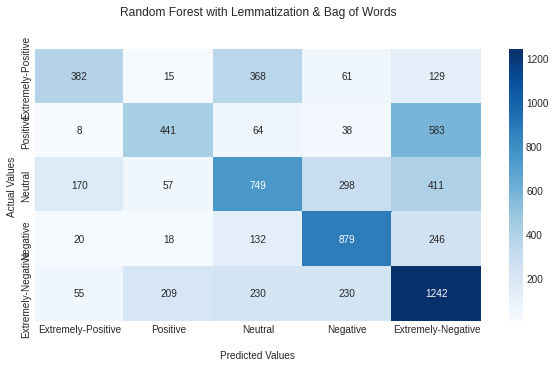

In [236]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('Random Forest with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**XGBoost**

In [237]:
# @title XGBoost
xgb = XGBClassifier()
ovr = OneVsRestClassifier(xgb)
ovr.fit(x_train, y_train)
y_pred = ovr.predict(x_test)

In [238]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("\n")
print(classification_report(y_test,y_pred))

print("\n")

xgb_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % xgb_accuracy)

xgb_precision = precision_score(y_test, y_pred, average="macro", pos_label='positive')
print('Precision: %f' % xgb_precision)

xgb_recall = recall_score(y_test, y_pred, average="macro", pos_label='positive')
print('Recall: %f' % xgb_recall)

xgb_f1_score = f1_score(y_test, y_pred, average="macro", pos_label='positive')
print('F1 Score: %f' % xgb_f1_score)


[[ 420   17  290   97  131]
 [  16  544   49   89  436]
 [ 141   52  640  338  514]
 [  20   16   96  710  453]
 [  40  215  246  326 1139]]


                    precision    recall  f1-score   support

Extremely Negative       0.66      0.44      0.53       955
Extremely Positive       0.64      0.48      0.55      1134
          Negative       0.48      0.38      0.43      1685
           Neutral       0.46      0.55      0.50      1295
          Positive       0.43      0.58      0.49      1966

          accuracy                           0.49      7035
         macro avg       0.53      0.49      0.50      7035
      weighted avg       0.51      0.49      0.49      7035



Accuracy: 0.490832
Precision: 0.533923
Recall: 0.485388
F1 Score: 0.498386


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning:

Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.



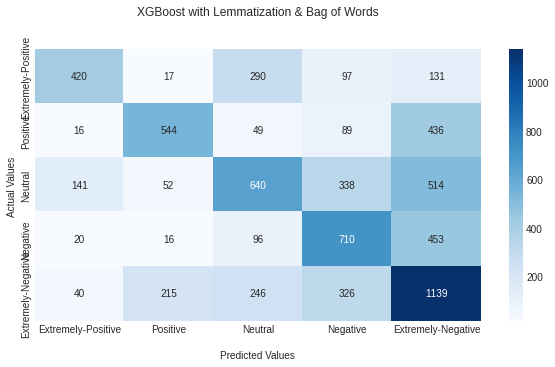

In [240]:
ax = sns.heatmap(cm,annot=True,cmap='Blues', fmt='g')

ax.set_title('XGBoost with Lemmatization & Bag of Words\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])
ax.yaxis.set_ticklabels(['Extremely-Positive','Positive','Neutral','Negative','Extremely-Negative'])

## Display the visualization of the Confusion Matrix.
plt.show()

**Comparision Graphs**

       Score       SVM        LR        RF       XGB
0  Accuracy   0.561478  0.565316  0.524947  0.490832
1  Precision  0.567301  0.574879  0.548457  0.533923
2  Recall     0.586637  0.582482  0.508781  0.485388
3  F1 Score   0.573553  0.577766  0.517113  0.498386





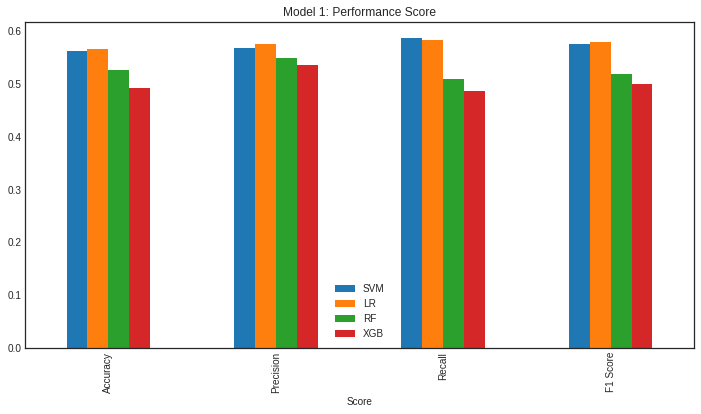

In [241]:
# @title Comparision Graphs


cmpDf = pd.DataFrame([['Accuracy', svm_accuracy, log_accuracy, rf_accuracy, xgb_accuracy], 
                      ['Precision', svm_precision, log_precision, rf_precision, xgb_precision], 
                      ['Recall', svm_recall, log_recall, rf_recall, xgb_recall],
                      ['F1 Score', svm_f1_score, log_f1_score, rf_f1_score, xgb_f1_score]],
                  columns=['Score', 'SVM', 'LR', 'RF', 'XGB'])
# view data
print(cmpDf)
print("\n\n")

# plot grouped bar chart
ax = cmpDf.plot(x='Score',
        figsize=(12,6),
        kind='bar',
        stacked=False,
        title='Model 1: Performance Score')
